# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:

%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np


# Challenge 1 - Reading and Standardizing the Data

In this challenge we will work with image data and reduce the dimensions of the data to create a 2 dimensional plot. While we have not worked much with image data before, it can be represented as a numpy array where each pixel is assigned a numeric value. In this lesson, we will look at a dataset of cats and a dataset of dogs and see whether reducing them to two dimensions allows us to see if the data is separable. We will start by loading and processing the data. Run the cell below to load the two csv files and convert them into numpy arrays.

In [3]:

cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", header=None))
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", header=None))

Next, we'll examine the shape of both the cats and the dogs arrays. Print out both shapes below.

In [4]:
print("Cats:", cats.shape, "Dogs:", dogs.shape)

Cats: (4096, 80) Dogs: (4096, 80)


What this means is that both arrays contain 80 images each (the number of columns). Each image is comprised of 64x64 pixels (so a total of 4096 pixels per image). The images have been flattened such that all 4096 are in a single row.

Print out column 0 of the cats array to see what the pixels values look like.

In [5]:
print(cats[0])      

[ 64  23 250 137  55 173  18 134  19  47 109 164  41  78 108 108 247 105
 158  54 103   4  23 102 239  72  42  21 168 109 112 177  22 233  15 236
 250 137  32   5 178 109  24 107  53 241 226 143   5 136  98 100  89  66
 228  92 255  88 230  56 160  69   6  24 195 183 239  35 154 154 122  18
  87 106 174  69  28  60 223 101]


In [6]:
pd.DataFrame(cats.T)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,64,64,64,64,64,77,77,77,77,77,...,64,64,77,77,64,77,77,64,64,61
1,23,23,20,20,9,9,9,4,4,4,...,108,108,108,108,89,65,51,31,23,9
2,250,250,250,244,244,244,244,244,232,232,...,244,244,244,232,244,244,244,244,232,244
3,137,137,137,144,151,151,151,158,151,151,...,74,89,89,78,78,78,100,102,124,124
4,55,55,55,55,55,55,55,55,55,55,...,45,45,45,45,45,45,45,37,45,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,69,71,73,76,77,79,77,81,82,83,...,79,77,78,70,65,66,65,88,99,66
76,28,32,28,38,22,14,19,18,19,21,...,154,148,152,148,145,144,136,141,144,144
77,60,50,63,53,43,50,64,71,70,50,...,107,114,112,104,101,94,92,105,118,104
78,223,224,225,230,233,230,240,235,228,229,...,177,178,176,182,185,184,180,180,182,177


Using `matplotlib` we can plot a single cat or a single dog. We do this by reshaping the vector back to a 64x64 image and then using the `imshow` function.

Run the code below to look at the first dog and the first cat.

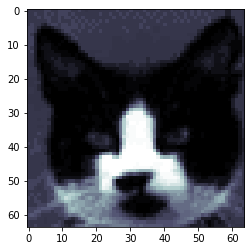

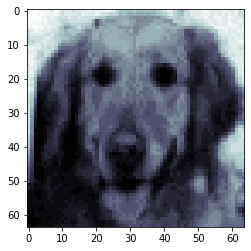

In [7]:
plt.figure()
plt.imshow(cats[:,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest')
plt.figure()
plt.imshow(dogs[:,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

Next, we would like to create a standardization function. This function will find the mean and standard deviation of each image. We subtract the mean from each pixel and divide each pixel by the standard deviation. Write the function below.

Hint: To find the mean and standard deviation of each image, use `numpy`'s version of mean and stadnard deviation and use `axis=0`.

In [8]:
#This function takes as input a numpy array and returns a stadardized numpy array of the same dimensions.
#Sample input: np.array([[1,2,3],[4,5,6]])
#Sample output: np.array([[-1,-1,-1],[1,1,1]])

def standardize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)
    

Now, use the `np.concatenate` function to combine the cats and dogs arrays. Use `axis=1` to combine the two correctly. Make sure to put dogs first.

In [9]:
concat = np.concatenate((dogs, cats), axis=1)

Standardize the concatenated array below.

In [10]:
stdconcat = standardize(concat)

stdconcat.shape

(4096, 160)

# Challenge 2 - Using PCA

Now that we have created a standardized matrix of cats and dogs, we'll find the two most important components in the data.

Load the `PCA` function from `statsmodels` (read about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.multivariate.pca.PCA.html)) and apply the function to our standarized data. Create a PCA model with two components.

In [11]:
# STATSModels devuelve los coeficientes por los que tengo que multiplicar la matriz

from statsmodels.multivariate.pca import PCA

pc = PCA(stdconcat.T, ncomp=2)

print(pc.factors.shape)

coef_componentes = pc.factors

(160, 2)


In [12]:
# la multiplicación de matrices ocurre con igualdad de filas de
# la primera con las columnas de la segunda

matrix_2d = concat.shape * coef_componentes


Use `numpy` to find to transpose the standardized pet array. This will help us compute the projection.

Find the dot product of the transposed standardized pet matrix and the `factors` of the `PCA` model found above. This will be the projection onto 2 dimensions. This means that each cat and dog image will now only have two columns instead of 4096.

In [13]:
matrix_2d.shape

(160, 2)

# Challenge 3 - Plotting the Data

Now that we have reduced our cats and dogs arrays, we can easily plot the data in a way that the human eye can understand. We can look at this plot to see whether there are differences between the cat and dog images. 

In the cell below, turn the two dimensional projection into a pandas dataframe and name the columns `pc1`, and `pc2` respectively.

In [35]:
df = pd.DataFrame(matrix_2d)
df = df.rename({"0":"pc1", "1": "pc2"}, axis=1)

df.head()

,0,1
0,-512.831922,13.011173
1,-427.896231,-5.209400
2,120.427095,-6.160241
3,-83.870838,-17.038680
4,-389.579217,9.811311


Create a labels list. This list will be of size 160. The first 80 elements in the list will be the word `blue`, and the last 80 elements will be `red`. This will ensure that all dog observations will be colored in blue and all cats will be colored in red. Name this list `colors`.

In [30]:

colors = ["blue" if i <= 80 else "red" for i in range(160)]

Create a scatter plot of `pc1` and `pc2` below. Use the `colors` list above to color the observations by setting `c=colors`.

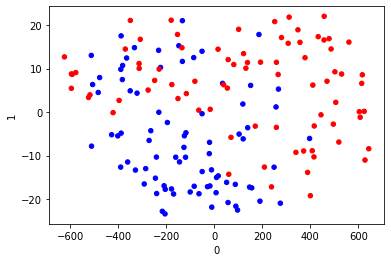

In [41]:


df.plot.scatter(x=0, y=1, c=colors)

Do you see a clear separation between cats and dogs? Write your answer below.

Aunque no sea perfecta, se pueden distinguir dos zonas prácticamente a la izquierda y a la derecha del 0 del OX.